In [1]:
import os
from datetime import datetime

import matplotlib.pyplot as plt
import nfts.dataset
import pandas as pd
import seaborn as sns

Set the path to the downloaded dataset.

In [2]:
home_dir = os.environ['HOME']
DATASET_PATH = os.path.join(home_dir, 'data', 'nfts.sqlite')
assert os.path.exists(DATASET_PATH), "Did not find file 'nfts.sqlite' at the given DATASET_PATH."
dataset = nfts.dataset.FromSQLite(DATASET_PATH)

Uncomment the following statement to see an explanation of the dataset.

In [3]:
# nfts.dataset.explain()

Plot the number of trades per day with a pandas histogram.

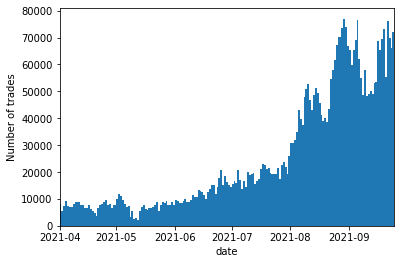

In [4]:
transfers = dataset.load_dataframe('transfers')
transfers['datetime'] = pd.to_datetime(transfers['timestamp'], unit='s')
bins = sorted(transfers['datetime'].dt.date.unique())
ax = transfers.plot.hist(column='datetime', bins=bins, xlim=(bins[0], bins[-1]), legend=False)
ax.set(xlabel='date', ylabel='Number of trades')
plt.show()

Plots with `seaborn` are a bit more versatile and the [appearance](http://seaborn.pydata.org/tutorial/aesthetics.html) as well as the [colors](https://seaborn.pydata.org/tutorial/color_palettes.html) are easier to customize. Here's a [histogram](https://seaborn.pydata.org/generated/seaborn.histplot.html).

In [5]:
transfers['date'] = pd.to_datetime(transfers['timestamp'], unit='s').dt.date

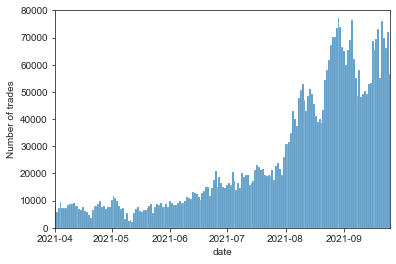

In [6]:
sns.set_style('ticks')
plt.figure()
sns.histplot(data=transfers, x='date')
plt.xlim(min(transfers['date']), max(transfers['date']))
plt.ylim(0, 80000)
plt.ylabel('Number of trades')
plt.show()

Another example with a [displot](https://seaborn.pydata.org/generated/seaborn.displot.html):

<Figure size 432x288 with 0 Axes>

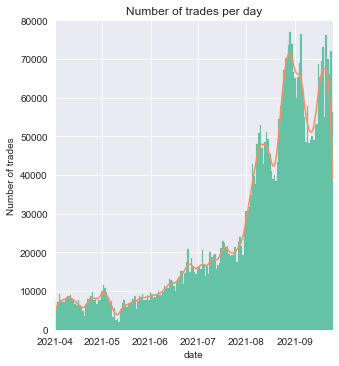

In [7]:
sns.set_style('darkgrid')
colors = sns.color_palette('Set2')
plt.figure()
sns.displot(data=transfers, x='date', kde=True, color=colors[1], facecolor=colors[0], edgecolor=colors[0])
plt.xlim(min(transfers['date']), max(transfers['date']))
plt.ylim(0, 80000)
plt.ylabel('Number of trades')
plt.title('Number of trades per day')
plt.show()

The same can also be done with a [barplot](https://seaborn.pydata.org/generated/seaborn.barplot.html).

In [8]:
trades_per_date = transfers.groupby('date', as_index=False).size()
ticks = list(range(0, len(trades_per_date), 20))
labels = [trades_per_date.iloc[i]['date'] for i in ticks]

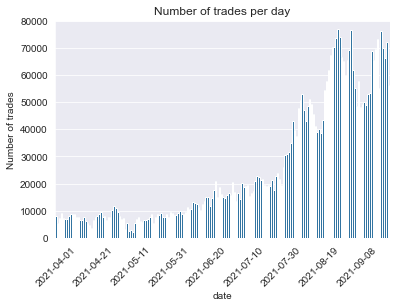

In [9]:
plt.figure()
sns.barplot(data=trades_per_date, x='date', y='size', color=sns.color_palette()[0])
plt.ylim(0, 80000)
plt.xticks(ticks=ticks, labels=labels, rotation=45)
plt.ylabel('Number of trades')
plt.title('Number of trades per day')
plt.show()

*(Hmm, something went a bit wrong here. Maybe the figure needs to be larger by using e.g. `plt.figure(figsize=(10,4))`, but doesn't seem to work inside a notebook.)*

... or a [lineplot](https://seaborn.pydata.org/generated/seaborn.lineplot.html).

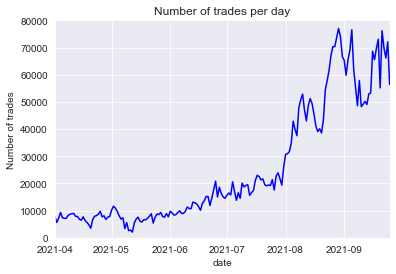

In [10]:
plt.figure()
sns.lineplot(data=trades_per_date, x='date', y='size', color='b')
plt.xlim(min(trades_per_date['date']), max(trades_per_date['date']))
plt.ylim(0, 80000)
plt.ylabel('Number of trades')
plt.title('Number of trades per day')
plt.show()